<a href="https://colab.research.google.com/github/Jonathans0ramirez/HousePricePrediction/blob/master/Simulaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# TRAIN_URL = "https://www.kaggle.com/c/5407/download/train.csv"
# TEST_URL = "https://www.kaggle.com/c/5407/download/test.csv"
# DESC_URL = "https://www.kaggle.com/c/5407/download/data_description.txt"

## IMPORTS

In [0]:
import numpy as np
import pandas as pd
import datetime
import random

In [0]:
# Plots
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Scipy
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

In [0]:
# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [0]:
# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)

In [0]:
# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")
# pd.options.display.max_seq_items = 8000
# pd.options.display.max_rows = 8000

In [0]:
# Datasets

train = pd.read_csv("train.csv") #1872-2010
# -----------------------------------------------------------------------------
test = pd.read_csv("test.csv")
# -----------------------------------------------------------------------------
train.shape, test.shape

((1460, 81), (1459, 80))

## Pre-análisis

In [0]:
# The data
train.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
74,75,50,RM,60.0,5790,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,3,6,1915,1950,Gambrel,CompShg,VinylSd,VinylSd,None,0.0,Gd,Gd,CBlock,Fa,TA,No,Unf,0,Unf,0,840,840,GasA,Gd,N,SBrkr,840,765,0,1605,0,0,2,0,3,2,TA,8,Typ,0,NaN,Detchd,1915.0,Unf,1,379,TA,TA,Y,0,0,202,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,107400
332,333,20,RL,85.0,10655,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,No,GLQ,1124,NaN,479,1603,3206,GasA,Ex,Y,SBrkr,1629,0,0,1629,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2003.0,RFn,3,880,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal,284000
1221,1222,20,RL,55.0,8250,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,5,5,1968,1968,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,250,LwQ,492,210,952,GasA,Ex,Y,SBrkr,1211,0,0,1211,0,0,1,0,3,1,TA,5,Typ,1,TA,Attchd,1968.0,Unf,1,322,TA,TA,Y,0,63,0,0,0,0,NaN,NaN,NaN,0,8,2008,WD,Normal,134000
36,37,20,RL,112.0,10859,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1097,1097,GasA,Ex,Y,SBrkr,1097,0,0,1097,0,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1995.0,Unf,2,672,TA,TA,Y,392,64,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,145000
826,827,45,RM,50.0,6130,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,5,6,1924,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,ALQ,784,Unf,0,0,784,GasA,Gd,Y,SBrkr,784,0,0,784,1,0,1,0,2,1,Gd,5,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,116,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,109500


In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [0]:
# Differentiate numerical features (minus the target) and categorical features
# Categorical features
categorical_features = train.select_dtypes(include=['object']).columns
categorical_features

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [0]:
# Numerical features
numerical_features = train.select_dtypes(exclude = ["object"]).columns
numerical_features

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [0]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<blockquote><p>Esto quiere decir que el precio medio está alrededor de 180k USD, la casa más costosa es de 775k USD y la más económica 43,9k USD</p></blockquote>

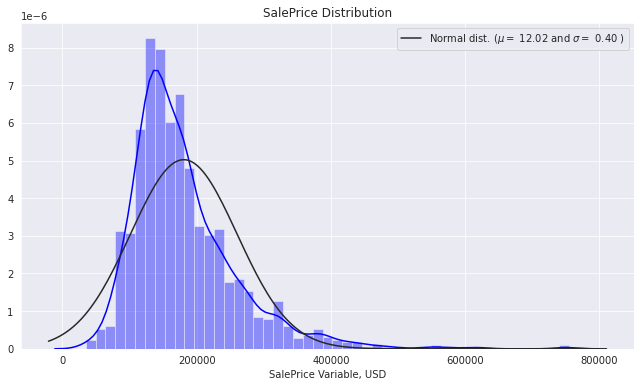

In [0]:
sns.set_style('darkgrid')
plt.subplots(figsize=(11, 6))
sns.distplot(train['SalePrice'], color="b", fit=norm)
(Mu, Sigma) = norm.fit(np.log1p(train["SalePrice"]))
plt.title("SalePrice Distribution")
plt.xlabel("SalePrice Variable, USD")
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(Mu, Sigma)],
            loc='best')
plt.show()

![Skewness](https://www.oreilly.com/library/view/clojure-for-data/9781784397180/graphics/7180OS_01_180.jpg)

<blockquote>
  <p>El precio de venta está sesgado a la derecha. Esto es un problema porque la mayoría de los modelos de ML no funcionan bien con datos no distribuidos normalmente. Podemos aplicar una transformación de log(1 + x) para corregir el sesgo.</p>
</blockquote>

In [0]:
len(train.query('SalePrice > 500000'))

9

<blockquote><p>Solo 9 tienen un precio mayor a 50K USD por lo que se podrían descartar como Outliers.<p></blockquote>

In [0]:
# Applying log transformation
#train['SalePrice'] = np.log1p(train['SalePrice'])

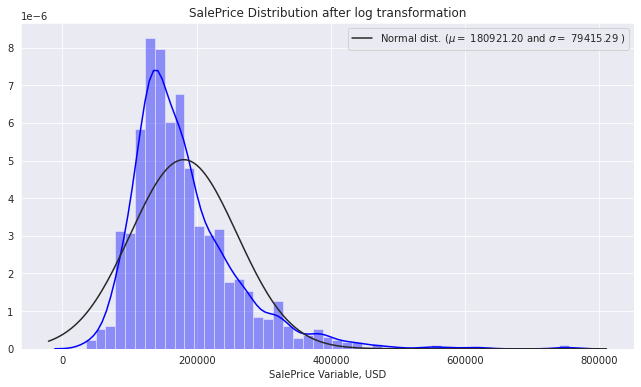


Mu: 180921.19589041095 Sigma: 79415.29188606751


In [0]:
sns.set_style('darkgrid')
plt.subplots(figsize=(11, 6))
sns.distplot(train['SalePrice'], color="b", fit=norm)
(Mu, Sigma) = norm.fit(train["SalePrice"])
plt.title("SalePrice Distribution after log transformation")
plt.xlabel("SalePrice Variable, USD")
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(Mu, Sigma)],
            loc='best')
plt.show()

print('\nMu:', Mu, 'Sigma:', Sigma)

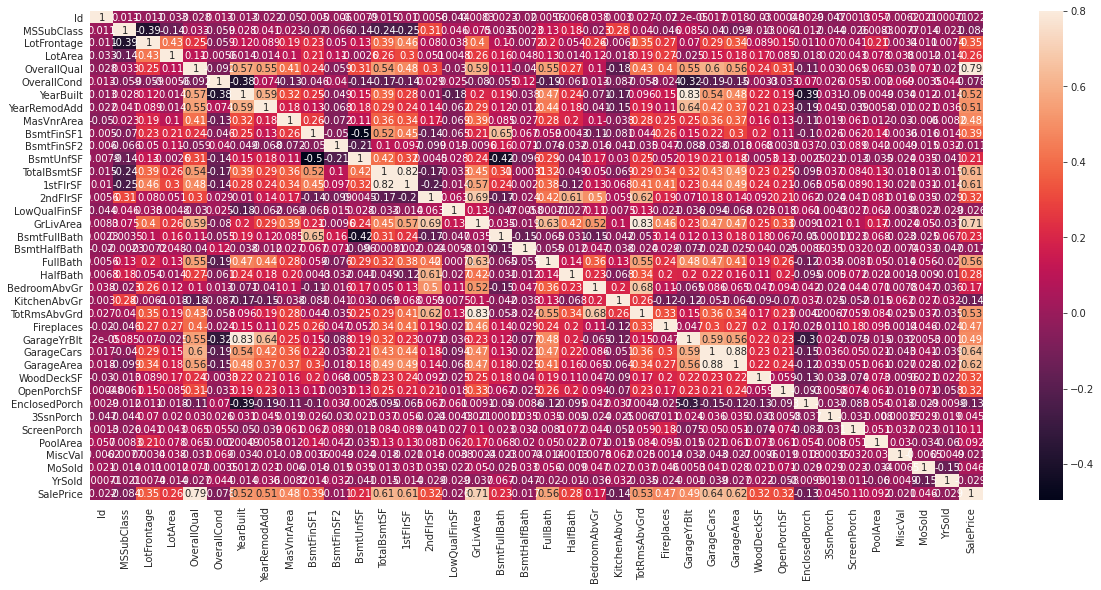

In [0]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=.8, annot=True);

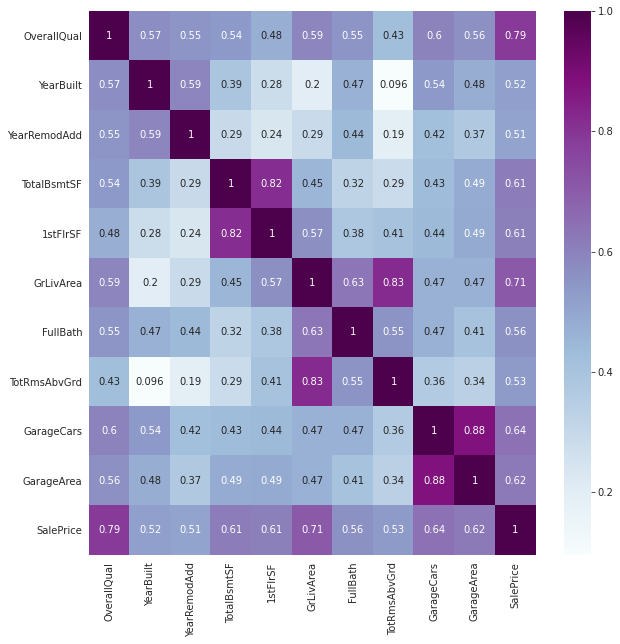

In [0]:
# most correlated features
corrmat = train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(train[top_corr_features].corr(),annot=True, cmap="BuPu")


<blockquote><h5>Algunas variables están correlacionadas entre sí</h5></blockquote>

#### _Descubrimientos_

* 'OverallQual', 'GrLivArea' y 'TotalBsmtSF' están estrechamente relacionadas con 'SalePrice'
* 'GarageCars' y 'GarageArea' también son variables candidatas. Sin embargo, consideramos que el número de carros puede verse reflejado en el área del garage. Son como gemelos, no se pueden distinguir. Es por ello, que solo necesitamos una de estas para nuestro análisis, y nos quedaremos con 'GarageCars' por ser la más correlacionada con 'SalePrice'.
* TotalBsmtSF' y '1stFloor' también son caracteristicas similares. En este caso conservamos 'TotalBsmtSF'.



### Scatter Plots

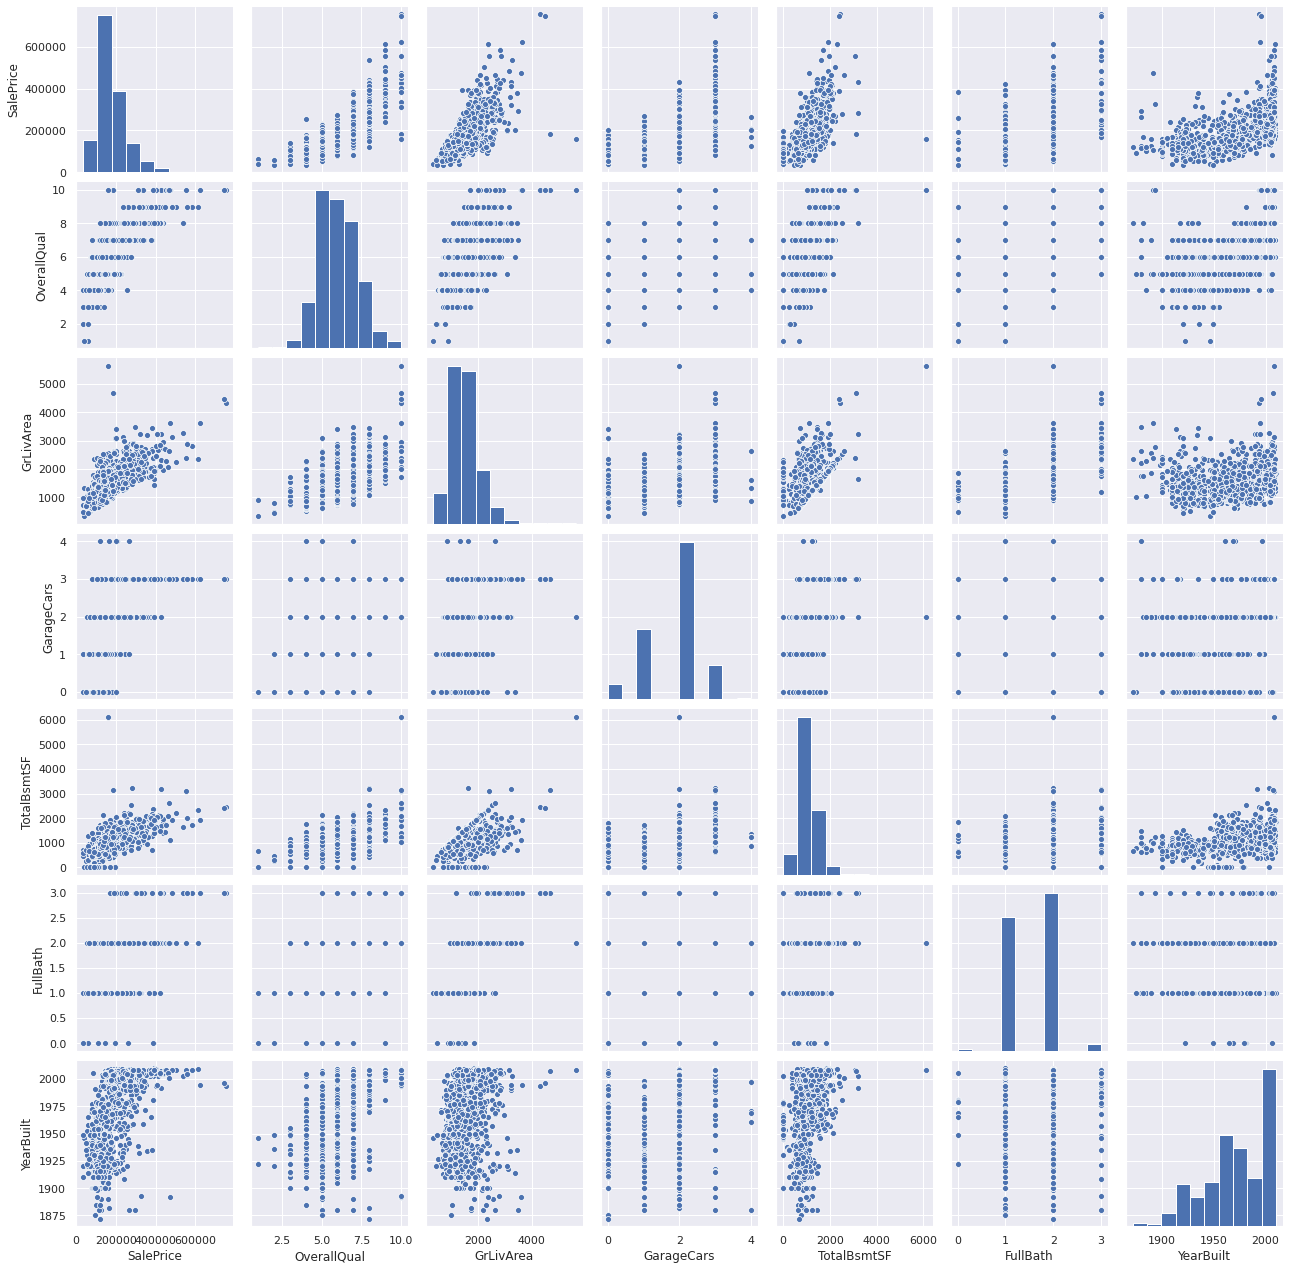

In [0]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show();

<blockquote><p>
  Estas figuras nos dan un acercamiento sobre lo relacionadas que se encuentran las variables.
</p></blockquote>

<blockquote><p>
  Por ejemplo en la gráfica 'TotalBsmtSF' vs 'GrLivArea' podemos observar que la mayoría de los puntos se ven limitados por una línea, y esto se debe a que la área del sotano por lo general no son mayores que el terreno disponible (a excepción de los bunkers).
</p></blockquote>

<blockquote><p>
  Por ejemplo en la gráfica 'TotalBsmtSF' vs 'GrLivArea' podemos observar que la mayoría de los puntos se ven limitados por una línea, y esto se debe a que la área del sotano por lo general no son mayores que el terreno disponible (a excepción de los bunkers).
</p></blockquote>

<blockquote><p>
  Otra observación está entre 'YearBuilt' vs 'SalePrice', los precios parecen estables, sin embargo a lo largo de los años su comportamiento parece ser exponencial.
</p></blockquote>

In [0]:
# Remove the Ids from train and test. (not useful for the model)
train_ID = train['Id']
test_ID = test['Id']
train.drop(['Id'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)
numerical_features = numerical_features.drop(['Id'], 1)
train.shape, test.shape

((1460, 80), (1459, 79))

## Missing Values (MV)

Se deben rellenar todos los missing values para permitirle a nuestro modelo funcionar correctamente.

Reemplazar los missing values por 0, injustificadamente, empeora la precisión del modelo. Es por ello que se decide reemplazarlo con valores de las muestras más cercanas correspondientes a la variable.

In [0]:
len(train), len(test)

(1460, 1459)

[Text(0, 0.5, 'Percent of missing values')]

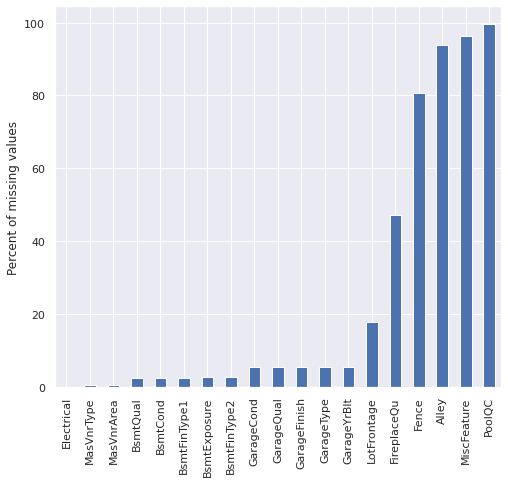

In [0]:
# Missing values plot
f, ax = plt.subplots(figsize=(8, 7))
missing = round(train.isnull().mean()*100,2)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()
ax.set(ylabel="Percent of missing values")

In [0]:
#Percent of missing values in train dataset

trainMV = train.isna().mean().round(4)* 100
trainMV.sort_values(ascending=False).head(20) 

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageType       5.55
GarageCond       5.55
GarageFinish     5.55
GarageQual       5.55
GarageYrBlt      5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
RoofMatl         0.00
dtype: float64

<blockquote>
  <p>
    Cuatro features (PoolQC, MiscFeature, Type of alley access and Fence quality) tienen más del 80% de missing values. Lo que indica que estas features no afectan directamente el precio de venta final y se podrían descartar de ambos datasets
  </p>
</blockquote>

In [0]:
#Percent of missing values in test dataset

testMV = test.isna().mean().round(4) * 100
testMV.sort_values(ascending=False).head(20)

PoolQC          99.79
MiscFeature     96.50
Alley           92.67
Fence           80.12
FireplaceQu     50.03
LotFrontage     15.56
GarageCond       5.35
GarageFinish     5.35
GarageYrBlt      5.35
GarageQual       5.35
GarageType       5.21
BsmtCond         3.08
BsmtExposure     3.02
BsmtQual         3.02
BsmtFinType1     2.88
BsmtFinType2     2.88
MasVnrType       1.10
MasVnrArea       1.03
MSZoning         0.27
BsmtHalfBath     0.14
dtype: float64

In [0]:
# Deleting features from both dataset
train_labels = train['SalePrice'].reset_index(drop=True)

train = train.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], 1)
test = test.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], 1)

<blockquote><p>
  Lo mejor será combinar ambos dataset para trabajar mejor los Missing Values
</p></blockquote>

In [0]:
mixed = pd.concat([train] + [test]).reset_index(drop=True)

# Data view
mixed.sample(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,190,RH,60.0,10896,Pave,Reg,Bnk,AllPub,Inside,Gtl,SWISU,Feedr,Norm,2fmCon,2.5Fin,6,7,1914,1995,Hip,CompShg,VinylSd,VinylSd,None,0.0,Fa,TA,CBlock,TA,Fa,No,LwQ,256.0,Unf,0.0,1184.0,1440.0,GasA,Ex,Y,FuseA,1440,1440,515,3395,0.0,0.0,2,0,8,2,Fa,14,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,110,0,0,0,0,0,3,2007,WD,Abnorml,200000.0
2288,20,RL,110.0,14333,Pave,Reg,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,1518.0,Unf,0.0,590.0,2108.0,GasA,Ex,Y,SBrkr,2122,0,0,2122,1.0,0.0,2,1,2,1,Gd,7,Typ,1,Ex,Attchd,2007.0,Fin,3.0,938.0,TA,TA,Y,130,142,0,0,0,0,0,11,2007,New,Partial,NaN
883,75,RL,60.0,6204,Pave,Reg,Bnk,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,2.5Fin,4,5,1912,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,PConc,TA,Fa,No,Unf,0.0,Unf,0.0,795.0,795.0,GasA,TA,N,SBrkr,954,795,481,2230,1.0,0.0,1,0,5,1,TA,10,Typ,0,NaN,Detchd,1997.0,Unf,1.0,440.0,TA,Gd,Y,0,188,0,0,0,0,0,3,2006,WD,Normal,118500.0
2211,50,RM,60.0,6000,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,6,8,1940,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,Fa,TA,No,Unf,0.0,Unf,0.0,720.0,720.0,GasA,Gd,Y,SBrkr,760,330,0,1090,0.0,0.0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1940.0,Unf,1.0,240.0,TA,TA,Y,0,0,0,0,0,0,0,7,2008,WD,Normal,NaN
1131,20,RL,63.0,10712,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,5,1991,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,Mn,BLQ,212.0,Unf,0.0,762.0,974.0,GasA,TA,Y,SBrkr,974,0,0,974,0.0,0.0,1,0,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,28,0,0,0,0,0,9,2007,Oth,Abnorml,93500.0


In [0]:
# Look the entire MV

temp = mixed.isna().sum().sort_values()
temp[temp>=1]

KitchenQual        1
GarageCars         1
Electrical         1
Exterior1st        1
Exterior2nd        1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
SaleType           1
GarageArea         1
BsmtHalfBath       2
Functional         2
Utilities          2
BsmtFullBath       2
MSZoning           4
MasVnrArea        23
MasVnrType        24
BsmtFinType1      79
BsmtFinType2      80
BsmtQual          81
BsmtExposure      82
BsmtCond          82
GarageType       157
GarageCond       159
GarageFinish     159
GarageYrBlt      159
GarageQual       159
LotFrontage      486
FireplaceQu     1420
SalePrice       1459
dtype: int64

<blockquote><p>
  Primero trabajaremos sobre las características categoricas de la siguiente manera.
</p></blockquote>

In [0]:
# NaN values for these categorical features, means there's nothing.

mixed['FireplaceQu'] = mixed['FireplaceQu'].fillna('None')
mixed['GarageQual'] = mixed['GarageQual'].fillna('None')
mixed['GarageFinish'] = mixed['GarageFinish'].fillna('None')
mixed['GarageCond'] = mixed['GarageCond'].fillna('None')
mixed['GarageType'] = mixed['GarageType'].fillna('None')
mixed['BsmtExposure'] = mixed['BsmtExposure'].fillna('None')
mixed['BsmtQual'] = mixed['BsmtQual'].fillna('None')
mixed['BsmtCond'] = mixed['BsmtCond'].fillna('None')
mixed['BsmtFinType2'] = mixed['BsmtFinType2'].fillna('None')
mixed['BsmtFinType1'] = mixed['BsmtFinType1'].fillna('None')
mixed['MasVnrType'] = mixed['MasVnrType'].fillna('None')
mixed['BsmtFinType2'] = mixed['BsmtFinType2'].fillna('None')

# Look again
mixed.isna().sum().sort_values(ascending=False).head(20)

SalePrice       1459
LotFrontage      486
GarageYrBlt      159
MasVnrArea        23
MSZoning           4
Utilities          2
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
BsmtFinSF1         1
SaleType           1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
GarageArea         1
GarageCars         1
Exterior2nd        1
Exterior1st        1
KitchenQual        1
Electrical         1
dtype: int64

### LotFrontage: Linear feet of street connected to property.

<blockquote>
  <p>Verificamos la correlación con 'LotArea' (Lot size in square feet).</p></blockquote>

             LotFrontage   LotArea
LotFrontage     1.000000  0.489896
LotArea         0.489896  1.000000


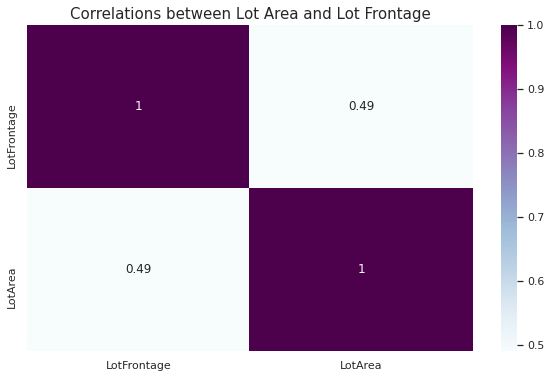

In [0]:
temp = mixed[['LotFrontage','LotArea']]

plt.figure(figsize=(10,6))
sns.scatterplot(x=temp['LotFrontage'], y=temp['LotArea'])
plt.title('Correlations between Lot Area and Lot Frontage', size=15);

g = sns.heatmap(temp.corr(),annot=True, cmap="BuPu")

print(temp.corr())

<blockquote><p>
  Rellenaremos los MV de 'LotFrontage' con la raíz cuadrada de 'LotArea'.
</p></blockquote>

In [0]:
mixed['LotFrontage'] = mixed['LotFrontage'].fillna(np.sqrt(mixed['LotArea']))

             LotFrontage   LotArea
LotFrontage     1.000000  0.626687
LotArea         0.626687  1.000000


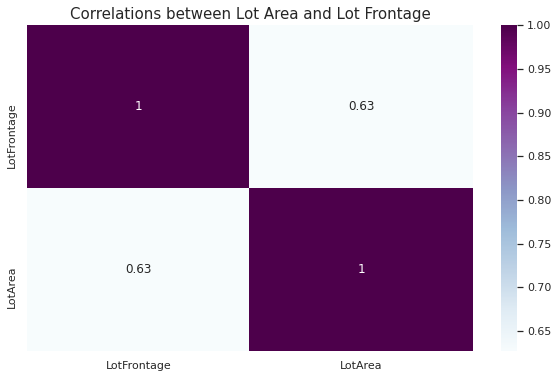

In [0]:
temp = mixed[['LotFrontage','LotArea']]

plt.figure(figsize=(10,6))
sns.scatterplot(x=temp['LotFrontage'], y=temp['LotArea'])
plt.title('Correlations between Lot Area and Lot Frontage', size=15);

g = sns.heatmap(temp.corr(),annot=True, cmap="BuPu")

print(temp.corr())

### GarageYrBlt: Year garage was built.

<blockquote>
  <p>Buscamos una relación con 'YearBuilt'</p></blockquote>

In [0]:
temp_year = mixed[['GarageYrBlt', 'YearBuilt']]

temp_year

,GarageYrBlt,YearBuilt
0,2003.0,2003
1,1976.0,1976
2,2001.0,2001
3,1998.0,1915
4,2000.0,2000
...,...,...
2914,NaN,1970
2915,1970.0,1970
2916,1960.0,1960
2917,NaN,1992


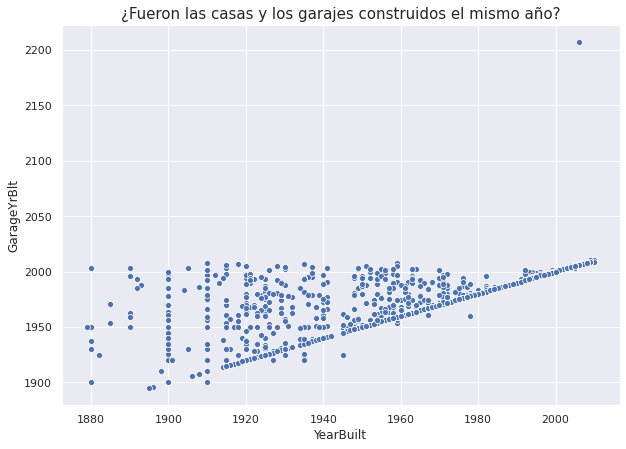

In [0]:
plt.figure(figsize=(10,7))
sns.scatterplot(temp_year['YearBuilt'], temp_year['GarageYrBlt'])
plt.title('¿Fueron las casas y los garajes construidos el mismo año?', size=15);

In [0]:
mixed.query('GarageYrBlt>2100')['GarageYrBlt']

2592    2207.0
Name: GarageYrBlt, dtype: float64

<blockquote>
  <h4>Análisis</h4>
</blockquote>

<ul>
  <li>Algunos garajes se construyeron tiempo después de la casa.</li>
  <li>Después de 1980 casi todas las casas fueron construidas con garaje.</li>
  <li>Para el año 2207 se piensa construir un garaje.</li>
</ul>

<blockquote>
  <p>El dato más alejado es un dato atípico entonces lo desconsideramos.</p>
</blockquote>

In [0]:
mixed.loc[mixed['GarageYrBlt'] == 2207,'GarageYrBlt'] = 2007

<blockquote>
  <p>Finalmente rellenamos los MV de 'GarageYrBlt con 'YearBuilt'.</p>
</blockquote>

In [0]:
mixed['GarageYrBlt'] = mixed['GarageYrBlt'].fillna(mixed['YearBuilt'])

### GarageArea: Size of garage in square feet.
### GarageCars: Size of garage in car capacity.

<blockquote>
  <p>Llenamos el MV en GarageArea con su mediana luego de ordenar los datos.</p>
</blockquote>

In [0]:
# Group for better management.
mixed['GarageArea'] = mixed.groupby('GarageType')['GarageArea'].transform(lambda x: x.fillna(value=x.median()))

<blockquote>
  <p>Se encontró una relación entre 'GarageArea' y 'GarageCars'. Entonces se comprueba.</p>
</blockquote>

            GarageCars  GarageArea
GarageCars      1.0000      0.8897
GarageArea      0.8897      1.0000


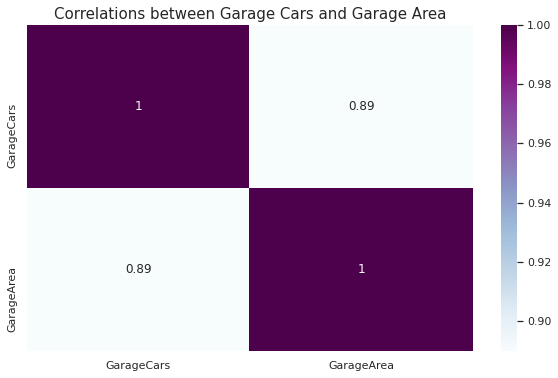

In [0]:
mixed['GarageCars'].corr(mixed['GarageArea'])

temp = mixed[['GarageCars','GarageArea']]

plt.figure(figsize=(10,6))
sns.scatterplot(x=temp['GarageCars'], y=temp['GarageArea'])
plt.title('Correlations between Garage Cars and Garage Area', size=15);

g = sns.heatmap(temp.corr(),annot=True, cmap="BuPu")

print(temp.corr())

In [0]:
mixed.loc[mixed['GarageCars'].isna()]['GarageArea']

2576    399.5
Name: GarageArea, dtype: float64

<blockquote>
  <p>Nos fijamos en el 'GarageArea' por su estrecha relación con 'GarageCars' y llegamos a la conclusión que aproximadamente 400 sq ft.</p>
</blockquote>

<blockquote>
  <p>Es por ello que miraremos cuál es la capacidad de coches para 400 sq ft.</p>
</blockquote>

In [0]:
mixed.loc[mixed['GarageArea'] == 400]['GarageCars'].value_counts()

2.0    57
1.0     1
Name: GarageCars, dtype: int64

<blockquote>
  <p>2 coches.</p>
</blockquote>

In [0]:
mixed['GarageCars'] = mixed['GarageCars'].fillna(2)

### MasVnrArea: Masonry veneer area in square feet.

<blockquote>
  <p>Vamos a mirar por qué estos datos están vacíos.</p>
</blockquote>

In [0]:
mixed.loc[mixed['MasVnrArea'].isna()][['MasVnrArea', 'MasVnrType']]

,MasVnrArea,MasVnrType
234,NaN,None
529,NaN,None
650,NaN,None
936,NaN,None
973,NaN,None
977,NaN,None
1243,NaN,None
1278,NaN,None
1691,NaN,None
1706,NaN,None


In [0]:
mixed['MasVnrArea'] = mixed['MasVnrArea'].fillna(0)

### MSZoning: Identifies the general zoning classification of the sale.

<blockquote>
  <p>Buscando relaciones y patrones.</p>
</blockquote>

In [0]:
mixed.loc[mixed['MSZoning'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1915,30,NaN,109.000000,21780,Grvl,Reg,Lvl,NaN,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,4,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,None,None,None,None,0.0,None,0.0,0.0,0.0,GasA,TA,N,FuseA,810,0,0,810,0.0,0.0,1,0,1,1,TA,4,Min1,0,None,Detchd,1975.0,Unf,1.0,280.0,TA,TA,N,119,24,0,0,0,0,0,3,2009,ConLD,Normal,NaN
2216,20,NaN,80.000000,14584,Pave,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,None,None,None,None,0.0,None,0.0,0.0,0.0,Wall,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,NaN,0,None,Attchd,1952.0,Unf,2.0,487.0,Fa,Po,N,0,0,0,0,0,0,0,2,2008,WD,Abnorml,NaN
2250,70,NaN,237.907545,56600,Pave,IR1,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2.5Unf,5,1,1900,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,686.0,686.0,GasA,Ex,Y,SBrkr,1150,686,0,1836,0.0,0.0,2,0,4,1,TA,7,Maj1,0,None,Detchd,1900.0,Unf,1.0,288.0,TA,Fa,N,0,0,0,0,0,0,0,1,2008,WD,Normal,NaN
2904,20,NaN,125.000000,31250,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Artery,Norm,1Fam,1Story,1,3,1951,1951,Gable,CompShg,CBlock,VinylSd,None,0.0,TA,Fa,CBlock,None,None,None,None,0.0,None,0.0,0.0,0.0,GasA,TA,Y,FuseA,1600,0,0,1600,0.0,0.0,1,1,3,1,TA,6,Mod,0,None,Attchd,1951.0,Unf,1.0,270.0,Fa,TA,N,0,0,135,0,0,0,0,5,2006,WD,Normal,NaN


In [0]:
mixed['MSZoning'].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

<blockquote>
  <p>Se decidió rellenar estos MV con RL al ser el dominante.</p>
</blockquote>

In [0]:
mixed['MSZoning'] = mixed['MSZoning'].fillna(value='RL')

### Utilities

<blockquote>
  <p>Observemos 'YearBuilt' para estos MV.</p>
</blockquote>

In [0]:
mixed.loc[mixed['Utilities'].isna()]['YearBuilt'] 

1915    1910
1945    1952
Name: YearBuilt, dtype: int64

In [0]:
# Utilities in 1910
mixed.loc[mixed['YearBuilt'] == 1910]['Utilities'].value_counts()

AllPub    42
Name: Utilities, dtype: int64

In [0]:
# Utilities in 1952
mixed.loc[mixed['YearBuilt'] == 1952]['Utilities'].value_counts()

AllPub    17
Name: Utilities, dtype: int64

<blockquote>
  <p>Ambas tienen como tipo 'AllPub'.</p>
</blockquote>

In [0]:
mixed['Utilities'] = mixed['Utilities'].fillna(value='AllPub')

### BsmtFullBath: Basement full bathrooms
### BsmtHalfBath: Basement half bathrooms

In [0]:
mixed['BsmtHalfBath'].value_counts()

0.0    2742
1.0     171
2.0       4
Name: BsmtHalfBath, dtype: int64

In [0]:
mixed['BsmtFullBath'].value_counts()

0.0    1705
1.0    1172
2.0      38
3.0       2
Name: BsmtFullBath, dtype: int64

In [0]:
mixed.query('BsmtHalfBath=="nan" or BsmtFullBath=="nan"')[['BsmtHalfBath', 'BsmtFullBath', 'YearBuilt']]

,BsmtHalfBath,BsmtFullBath,YearBuilt
2120,NaN,NaN,1946
2188,NaN,NaN,1959


In [0]:
mixed.query('YearBuilt == 1959')['BsmtHalfBath'].value_counts()

0.0    39
1.0     3
Name: BsmtHalfBath, dtype: int64

In [0]:
mixed.query('YearBuilt == 1946')['BsmtHalfBath'].value_counts()

0.0    12
1.0     2
Name: BsmtHalfBath, dtype: int64

<blockquote>
  <p>Supondremos que no hay baños en estos años.</p>
</blockquote>

In [0]:
mixed['BsmtHalfBath'] = mixed['BsmtHalfBath'].fillna(0)

In [0]:
mixed['BsmtFullBath'] = mixed['BsmtFullBath'].fillna(0)

### Functional: Home functionality (Assume typical unless deductions are warranted)

<blockquote>
  <p>Simplemente llenaremos los MV con la moda como se hizo en puntos anteriores.</p>
</blockquote>

In [0]:
mixed['Functional'].mode()[0]

'Typ'

In [0]:
mixed['Functional'] = mixed['Functional'].fillna(mixed['Functional'].mode()[0])

### BsmtFinSF1: Type 1 finished square feet.
### BsmtFinSF2: Type 2 finished square feet.
### TotalBsmtSF: Total square feet of basement area

<blockquote>
  <h3>Para el caso de 'BsmtFinSF1'.</h3>
  <p>Podemos usar tanto su correlación con BsmtFullBath como la moda. Así.</p>
</blockquote>

              BsmtFinSF1  BsmtFullBath
BsmtFinSF1      1.000000      0.638943
BsmtFullBath    0.638943      1.000000


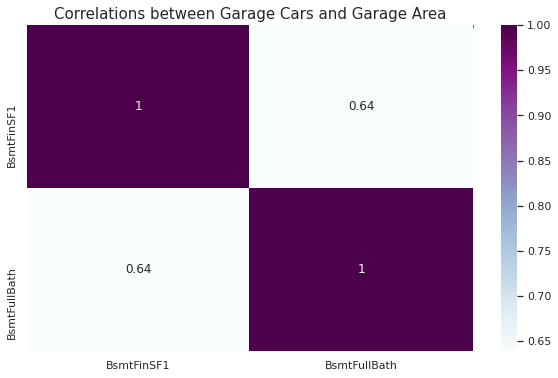

In [0]:
mixed['BsmtFinSF1'].corr(mixed['BsmtFullBath'])

temp = mixed[['BsmtFinSF1','BsmtFullBath']]

plt.figure(figsize=(10,6))
sns.scatterplot(x=temp['BsmtFinSF1'], y=temp['BsmtFullBath'])
plt.title('Correlations between Garage Cars and Garage Area', size=15);

g = sns.heatmap(temp.corr(),annot=True, cmap="BuPu")

print(temp.corr())

In [0]:
mixed.loc[mixed['BsmtFinSF1'].isna()]['BsmtFullBath']

2120    0.0
Name: BsmtFullBath, dtype: float64

In [0]:
mixed['BsmtFinSF1'].mode()[0]

0.0

In [0]:
mixed['BsmtFinSF1'] = mixed['BsmtFinSF1'].fillna(0)

<blockquote>
  <p>De forma similar se podría hacer con BsmtFinSF2, o mediante la correlación entre BsmtFinType_</p>
</blockquote>

In [0]:
mixed.loc[mixed['BsmtFinSF2'].isna()]['BsmtFinType2']

2120    None
Name: BsmtFinType2, dtype: object

<blockquote>
  <p>Observamos que no hay un tipo asignado para estos.</p>
</blockquote>

In [0]:
mixed['BsmtFinSF2'] = mixed['BsmtFinSF2'].fillna(0)

<blockquote>
  <h3>Para 'TotalBsmtSF'.</h3>
</blockquote>

In [0]:
mixed['TotalBsmtSF'].mode()[0]

0.0

In [0]:
mixed['BsmtUnfSF'].mode()[0]

0.0

In [0]:
mixed[['TotalBsmtSF','BsmtUnfSF']] = mixed[['TotalBsmtSF','BsmtUnfSF']].fillna(0)

### SaleType: Type of sale

<blockquote><p>¿Cuántos faltan?</p></blockquote>

In [0]:
mixed.isna().sum().sort_values(ascending=False).head(7)

SalePrice      1459
SaleType          1
Exterior1st       1
Electrical        1
KitchenQual       1
Exterior2nd       1
ExterCond         0
dtype: int64

In [0]:
mixed['SaleType'].mode()[0]

'WD'

In [0]:
mixed['SaleType'] = mixed['SaleType'].fillna(mixed['SaleType'].mode()[0])

### Exterior1st: Exterior covering on house
### Exterior2nd: Exterior covering on house (if more than one material)

<blockquote>
  <p>En este caso podríamos observar el año en el que fueron tomados estos datos y verificar cuál fue el material más popular para este año.</p>
</blockquote>

In [0]:
mixed.loc[mixed['Exterior1st'].isna()][['Exterior1st', 'Exterior2nd', 'YearBuilt']]

,Exterior1st,Exterior2nd,YearBuilt
2151,NaN,NaN,1940


In [0]:
mixed.loc[mixed['YearBuilt'] == 1940]['Exterior1st'].value_counts()

Wd Sdng    13
MetalSd    11
VinylSd     9
Stucco      1
WdShing     1
Name: Exterior1st, dtype: int64

In [0]:
mixed.loc[mixed['YearBuilt'] == 1940]['Exterior2nd'].value_counts()

MetalSd    12
Wd Sdng    10
VinylSd     9
Stucco      1
HdBoard     1
Wd Shng     1
Plywood     1
Name: Exterior2nd, dtype: int64

<blockquote>
  <p>Podemos concluir que ambos materiales exteriores son similares. Woord y Metal fueron los más comunes</p>
</blockquote>

<blockquote>
  <p>Usaremos MetalSd para rellenar los MV</p>
</blockquote>

In [0]:
mixed[['Exterior1st','Exterior2nd']] = mixed[['Exterior1st','Exterior2nd']].fillna('MetalSd')

### Electrical: Electrical system

In [0]:
mixed.loc[mixed['Electrical'].isna()]['YearBuilt']

1379    2006
Name: YearBuilt, dtype: int64

In [0]:
mixed.loc[mixed['YearBuilt'] == 2006]['Electrical'].value_counts()

SBrkr    137
Name: Electrical, dtype: int64

In [0]:
mixed['Electrical'] = mixed['Electrical'].fillna(value='SBrkr')

### KitchenQual: Kitchen quality

<blockquote>
  <p>Usaremos 'OverallCond' para determinar la calidad de la cocina.</p>
</blockquote>

In [0]:
mixed.loc[mixed['KitchenQual'].isna()]['YearBuilt']

1555    1917
Name: YearBuilt, dtype: int64

In [0]:
mixed.loc[mixed['YearBuilt']==1917][['KitchenQual', 'OverallCond']]

,KitchenQual,OverallCond
1248,TA,5
1555,NaN,3
1818,Ex,7


In [0]:
mixed.loc[mixed['OverallCond']==3]['KitchenQual'].value_counts()

TA    40
Fa     6
Gd     3
Name: KitchenQual, dtype: int64

In [0]:
mixed['KitchenQual'] = mixed['KitchenQual'].fillna(value='TA')

### After Missing Values

In [0]:
mixed.isna().sum().sort_values()

MSSubClass         0
Fireplaces         0
Functional         0
TotRmsAbvGrd       0
KitchenQual        0
                ... 
Exterior2nd        0
Exterior1st        0
RoofMatl           0
Foundation         0
SalePrice       1459
Length: 76, dtype: int64

## Outliers

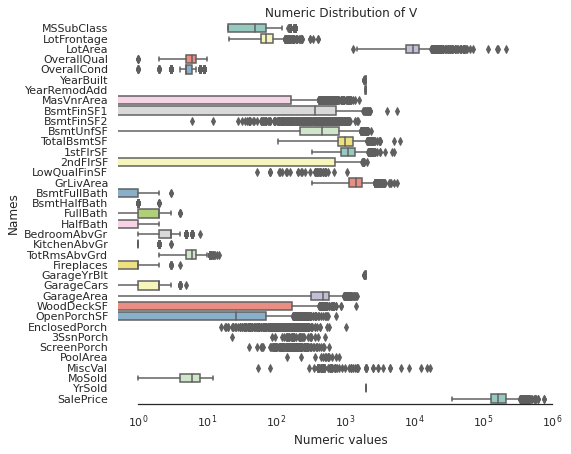

In [0]:
# VALORES ATIPICOS

sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=mixed[numerical_features] , orient="h", palette="Set3")
ax.xaxis.grid(False)
ax.set(ylabel="Names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of V")
sns.despine(trim=True, left=True)

In [0]:
# Find skewed numerical features
skew_features = mixed[numerical_features].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew' :high_skew})
skew_features.head(26)

There are 26 numerical features with Skew > 0.5 :


MiscVal          21.947195
PoolArea         16.898328
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
KitchenAbvGr      4.302254
BsmtFinSF2        4.146143
EnclosedPorch     4.003891
ScreenPorch       3.946694
BsmtHalfBath      3.931594
MasVnrArea        2.613592
OpenPorchSF       2.535114
LotFrontage       2.331216
WoodDeckSF        1.842433
1stFlrSF          1.469604
BsmtFinSF1        1.425230
MSSubClass        1.375457
GrLivArea         1.269358
TotalBsmtSF       1.156894
BsmtUnfSF         0.919339
2ndFlrSF          0.861675
TotRmsAbvGrd      0.758367
Fireplaces        0.733495
HalfBath          0.694566
BsmtFullBath      0.624832
OverallCond       0.570312
dtype: float64

<blockquote>
  <p>Utilizamos la función scipy boxcox1p que calcula la transformación Box-Cox. El objetivo es encontrar una transformación simple que nos permita normalizar los datos</p>
</blockquote>

In [0]:
# Normalize skewed features
for i in skew_index:
    mixed[i] = boxcox1p(mixed[i], boxcox_normmax(mixed[i] + 1))

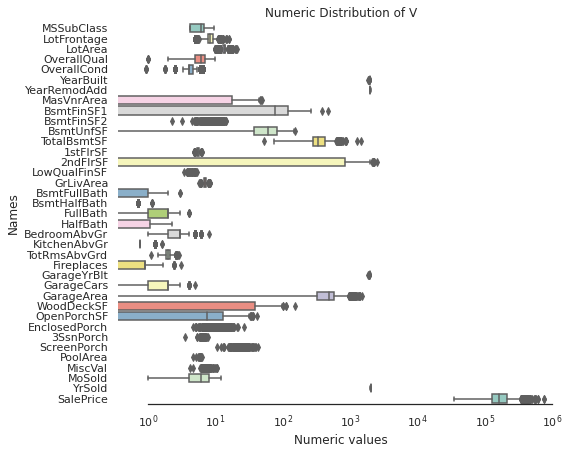

In [0]:
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=mixed[numerical_features] , orient="h", palette="Set3")
ax.xaxis.grid(False)
ax.set(ylabel="Names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of V")
sns.despine(trim=True, left=True)

## Split DataSet

In [0]:
mixed = pd.get_dummies(mixed, drop_first=True)

In [0]:
mixed = mixed.loc[:,~mixed.columns.duplicated()]

In [0]:
X = mixed.iloc[:len(train_labels), :]
X_test = mixed.iloc[len(train_labels):, :]
X.shape, train_labels.shape, X_test.shape

((1460, 247), (1460,), (1459, 247))

In [107]:
X.sample(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
165,9.536300,7.866734,13.804027,5,5.345038,1940,1999,0.000000,73.450063,8.289674,25.098138,235.346532,5.28

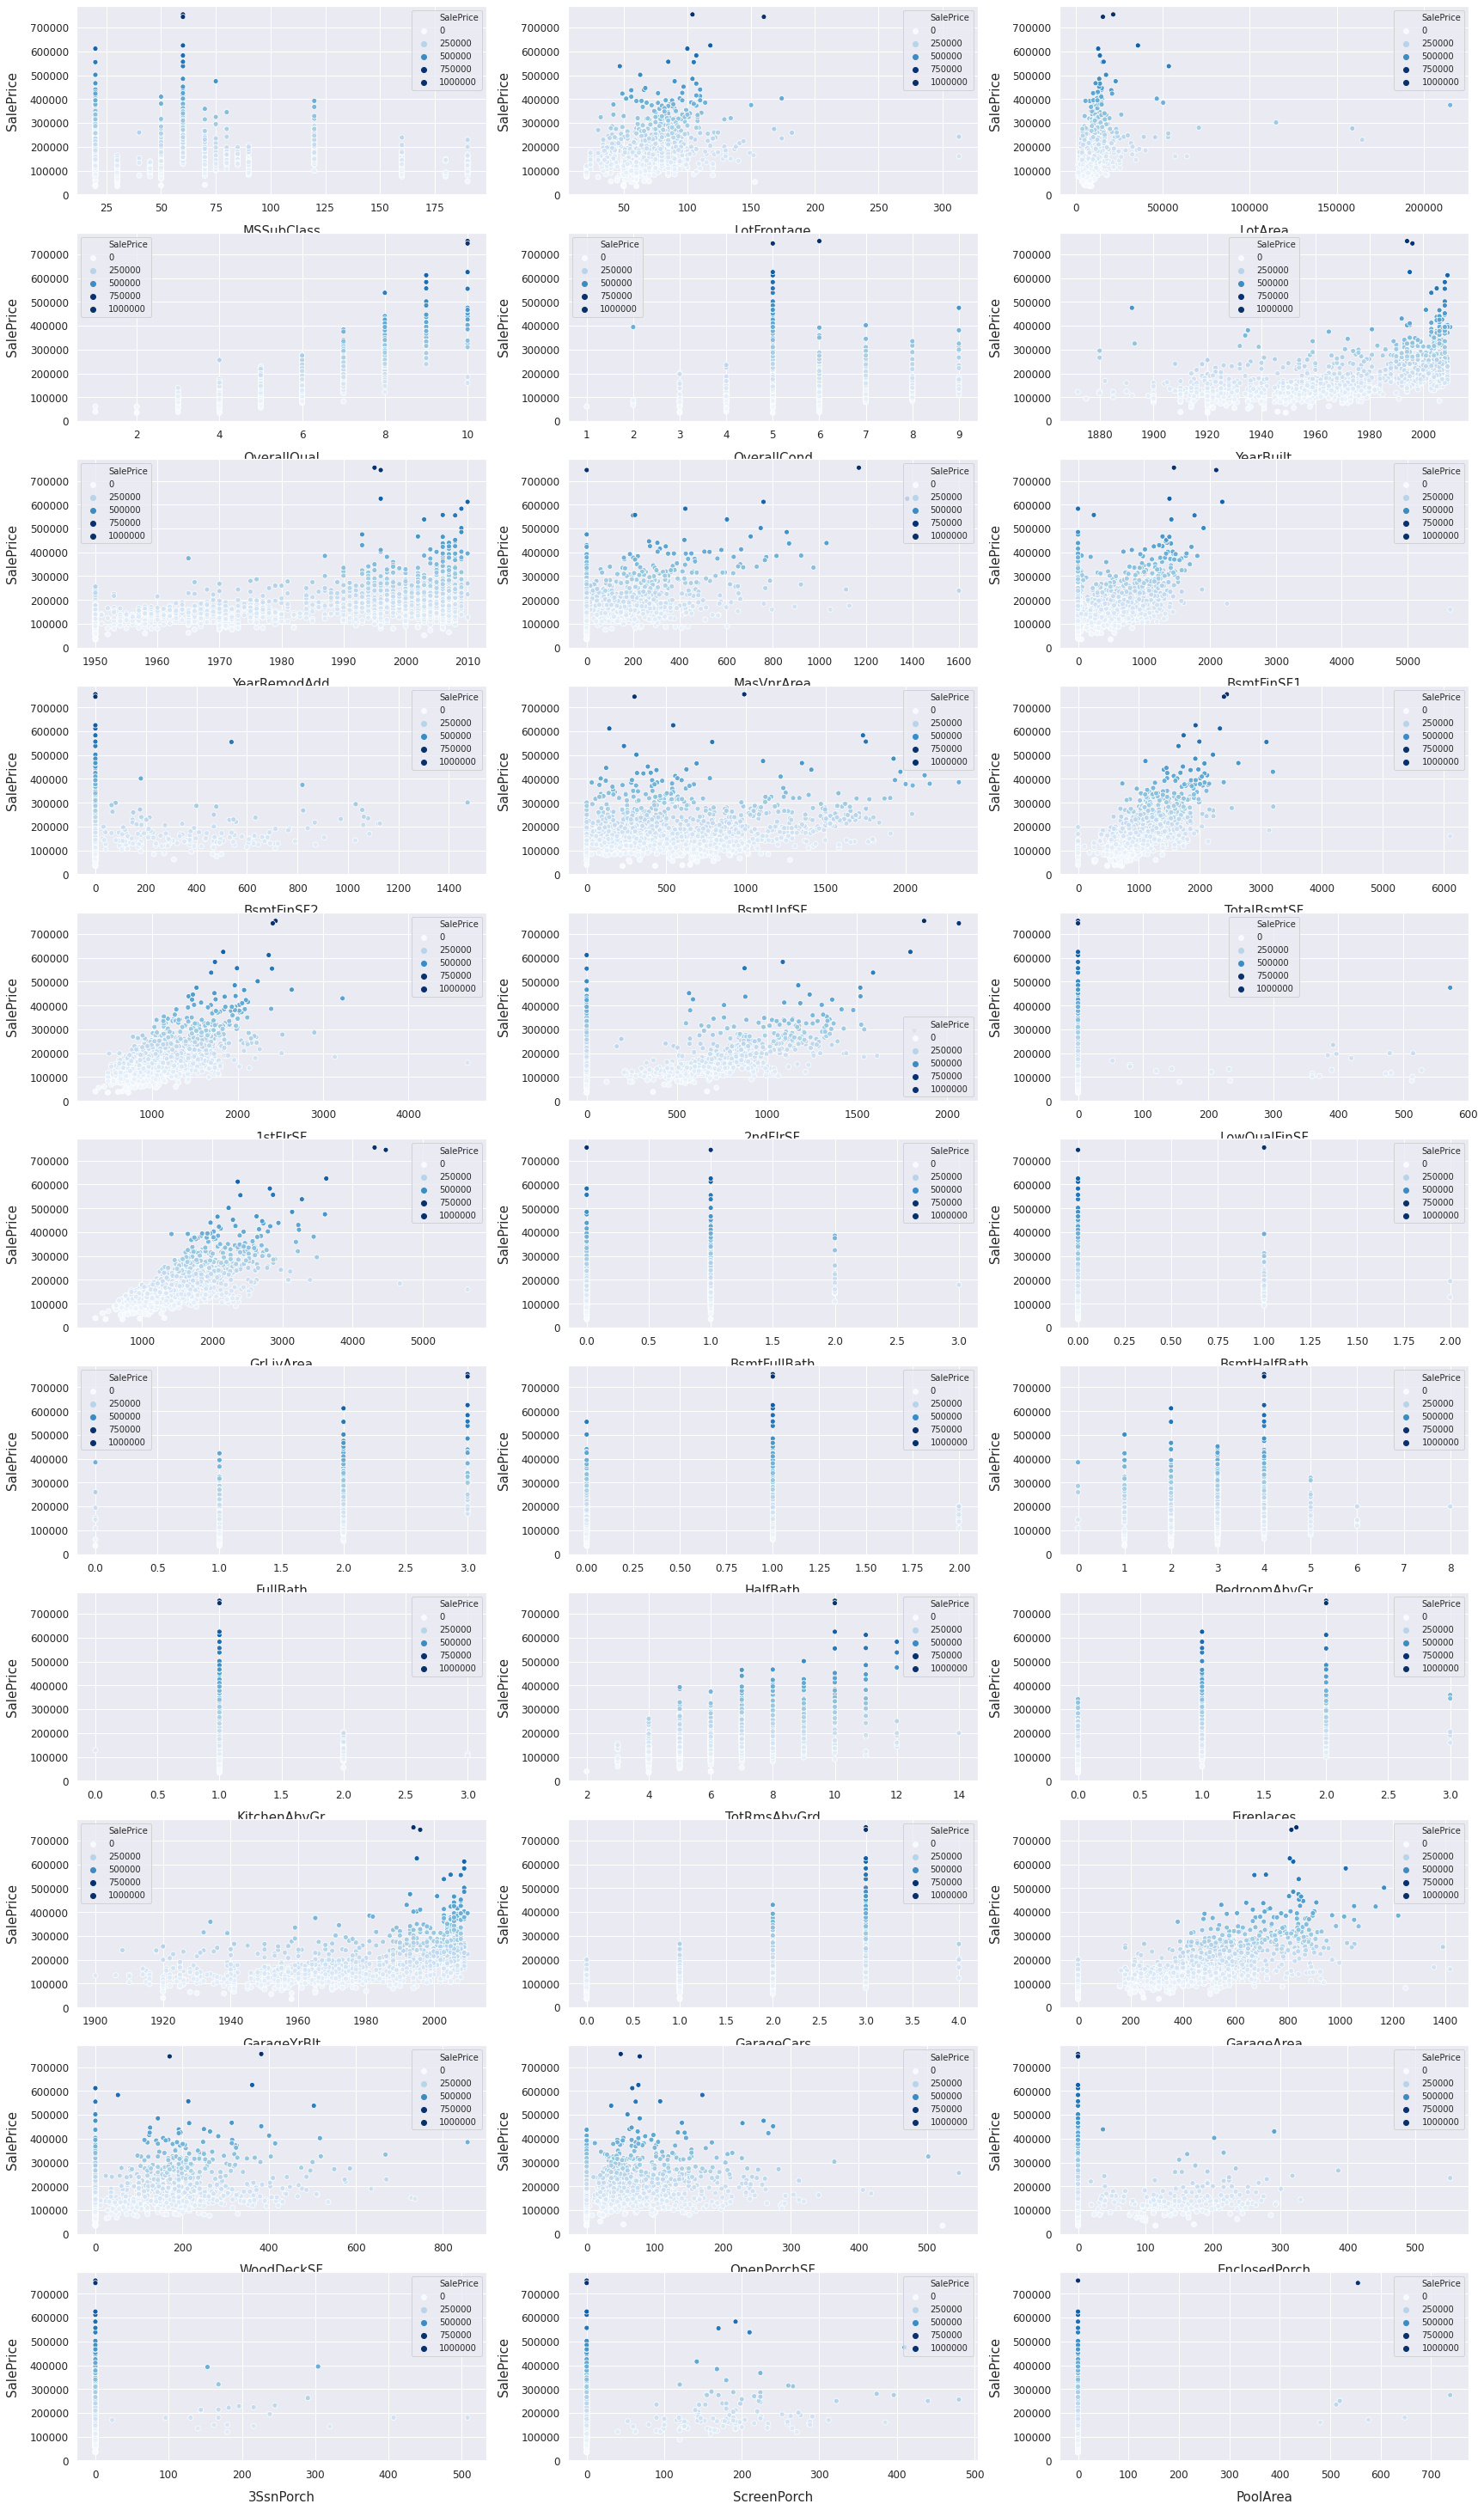

In [109]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in X.columns:
    if X[i].dtype in numeric_dtypes:
        numeric.append(i)     
# visualising some more outliers in the data values
fig, axs = plt.subplots(ncols=2, nrows=0, figsize=(12, 70))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
sns.color_palette("husl", 8)
for i, feature in enumerate(list(X[numeric]), 1):
    if(feature=='MiscVal'):
        break
    plt.subplot(len(list(numeric)), 3, i)
    sns.scatterplot(x=feature, y='SalePrice', hue='SalePrice', palette='Blues', data=train)
        
    plt.xlabel('{}'.format(feature), size=15,labelpad=12.5)
    plt.ylabel('SalePrice', size=15, labelpad=12.5)
    
    for j in range(2):
        plt.tick_params(axis='x', labelsize=12)
        plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(loc='best', prop={'size': 10})
        
plt.show()

## Algorithms

### K-Nearest Neighbors

In [0]:
# making the input and target features
y = X['SalePrice'].values
X = X.drop(['SalePrice'], axis = 1)

In [0]:
# Splitting the training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [0]:
# importing KNN regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
parameters = {
            'n_neighbors' : [1,2,3,4,5,6,7,8,9,10],
            'algorithm' : ['ball_tree', 'brute']
             }
grid_search_cv = GridSearchCV(KNeighborsRegressor(), parameters)
grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['ball_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
grid_search_cv.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 7}

In [0]:
# importing metrics for accuracy calculation
from sklearn.metrics import mean_squared_error

In [0]:
knn = KNeighborsRegressor(n_neighbors = 10)
# fitting the model with the training dataset
knn.fit(X_train, y_train)
# predicting the values
predicted_value = knn.predict(X_test)
# calculating the accuracy
rmse_after_cleaning = np.sqrt(mean_squared_error(predicted_value, y_test))
print('RSME: ', rmse_after_cleaning)

RSME:  45369.30582843472


Lower values of RMSE indicate better fit. RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction.

In [0]:
X_test.isnull().sum()

MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 246, dtype: int64

In [0]:
SalePrice = knn.predict(X_test)

In [0]:
KnnPrediction = pd.DataFrame()
KnnPrediction['Id'] = X_test.index
KnnPrediction['SalePrice'] = SalePrice

In [129]:
KnnPrediction.head()

,Id,SalePrice
0,80,205180.0
1,368,139435.0
2,750,88090.0
3,527,292800.0
4,279,226329.0


In [0]:
break;

SyntaxError: ignored

### Validation and fit

In [0]:
# Setup cross validation folds
kf = KFold(n_splits=12, random_state=42, shuffle=True)

In [0]:
def mae(model, X_train, X_test, y_train, y_test):
    
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print('MAE train = ', mean_absolute_error(y_train, y_train_pred))
    print('MAE test = ', mean_absolute_error(y_test, y_test_pred))


# Define error metrics
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, train_labels, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

In [0]:
# Light Gradient Boosting Regressor
lightgbm = LGBMRegressor(objective='regression', 
                       num_leaves=6,
                       learning_rate=0.01, 
                       n_estimators=7000,
                       max_bin=200, 
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=42)

# XGBoost Regressor
xgboost = XGBRegressor(learning_rate=0.01,
                       n_estimators=6000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:linear',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)

# Support Vector Regressor
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42)  

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=1200,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=42)

# Stack up all the models above, optimized using xgboost
stack_gen = StackingCVRegressor(regressors=(xgboost, lightgbm, svr, gbr, rf),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

In [113]:
scores = {}

score = cv_rmse(lightgbm)
print("lightgbm: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['lgb'] = (score.mean(), score.std())

lightgbm: 26274.9145 (5351.2029)


In [114]:
score = cv_rmse(xgboost)
print("xgboost: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['xgb'] = (score.mean(), score.std())

[01:56:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:57:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:58:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:58:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:59:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:00:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:00:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:01:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [115]:
score = cv_rmse(svr)
print("SVR: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['svr'] = (score.mean(), score.std())

SVR: 80930.4471 (8175.1726)


In [116]:
score = cv_rmse(rf)
print("rf: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['rf'] = (score.mean(), score.std())

rf: 30323.8949 (6861.0995)


In [117]:
score = cv_rmse(gbr)
print("gbr: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['gbr'] = (score.mean(), score.std())

gbr: 25687.8131 (7822.3884)


#### FIT MODELS

In [118]:
print('stack_gen')
stack_gen_model = stack_gen.fit(np.array(X), np.array(train_labels))

stack_gen
[02:11:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:12:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:12:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:13:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:13:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:17:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:17:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [119]:
print('lightgbm')
lgb_model_full_data = lightgbm.fit(X, train_labels)

lightgbm


In [120]:
print('xgboost')
xgb_model_full_data = xgboost.fit(X, train_labels)

xgboost
[02:19:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [121]:
print('Svr')
svr_model_full_data = svr.fit(X, train_labels)

Svr


In [122]:
print('RandomForest')
rf_model_full_data = rf.fit(X, train_labels)

RandomForest


In [123]:
print('GradientBoosting')
gbr_model_full_data = gbr.fit(X, train_labels)

GradientBoosting


In [0]:
# Blend models in order to make the final predictions more robust to overfitting
def blended_predictions(X):
    return ((0.2 * svr_model_full_data.predict(X)) + \
            (0.1 * gbr_model_full_data.predict(X)) + \
            (0.1 * xgb_model_full_data.predict(X)) + \
            (0.1 * lgb_model_full_data.predict(X)) + \
            (0.05 * rf_model_full_data.predict(X)) + \
            (0.35 * stack_gen_model.predict(np.array(X))))

In [125]:
# Get final precitions from the blended model
blended_score = rmsle(train_labels, blended_predictions(X))
scores['blended'] = (blended_score, 0)
print('RMSLE score on train data:')
print(blended_score)

RMSLE score on train data:
32747.30217642308


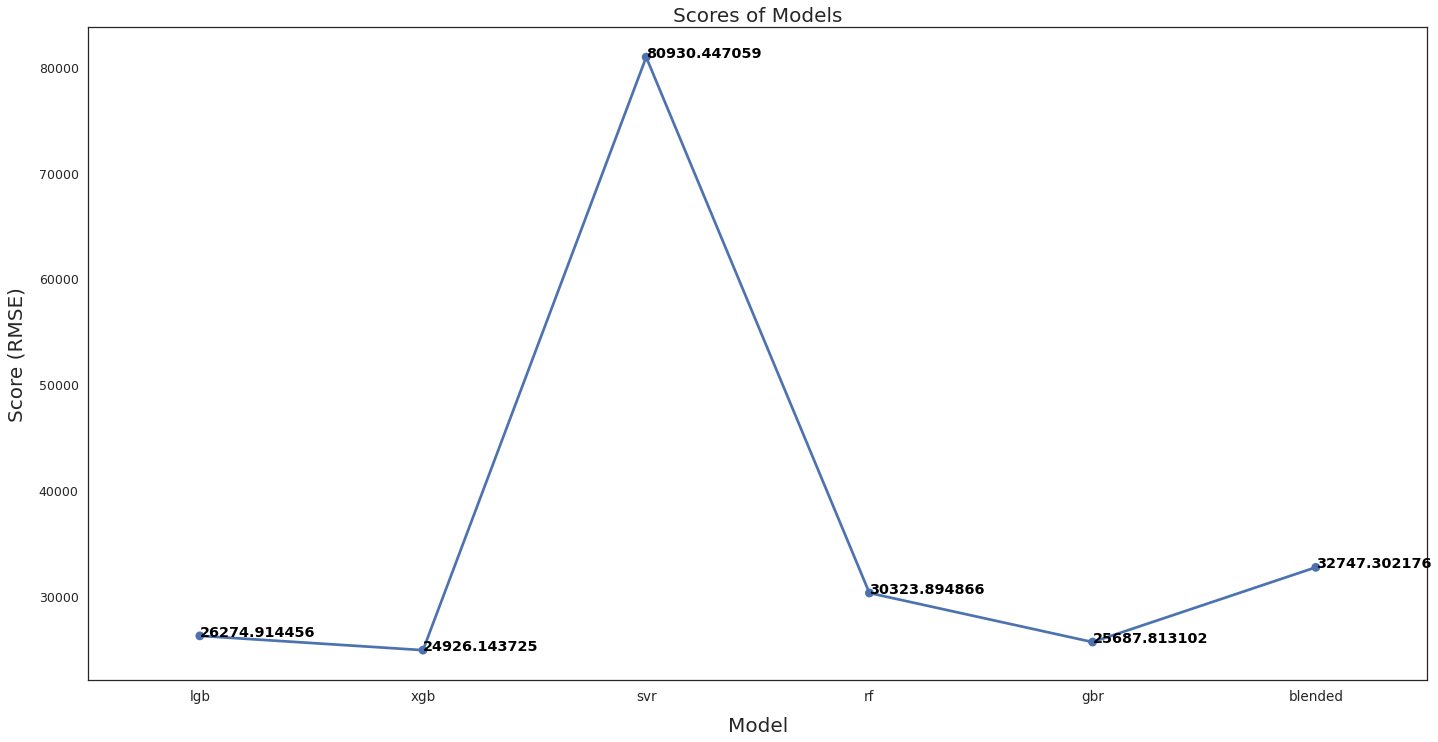

In [126]:
# Plot the predictions for each model
sns.set_style("white")
fig = plt.figure(figsize=(24, 12))

ax = sns.pointplot(x=list(scores.keys()), y=[score for score, _ in scores.values()], markers=['o'], linestyles=['-'])
for i, score in enumerate(scores.values()):
    ax.text(i, score[0] + 0.002, '{:.6f}'.format(score[0]), horizontalalignment='left', size='large', color='black', weight='semibold')

plt.ylabel('Score (RMSE)', size=20, labelpad=12.5)
plt.xlabel('Model', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=13.5)
plt.tick_params(axis='y', labelsize=12.5)

plt.title('Scores of Models', size=20)

plt.show()

In [0]:
break;
iffor

## UseFull Shit (No es Importante de acá a abajo)

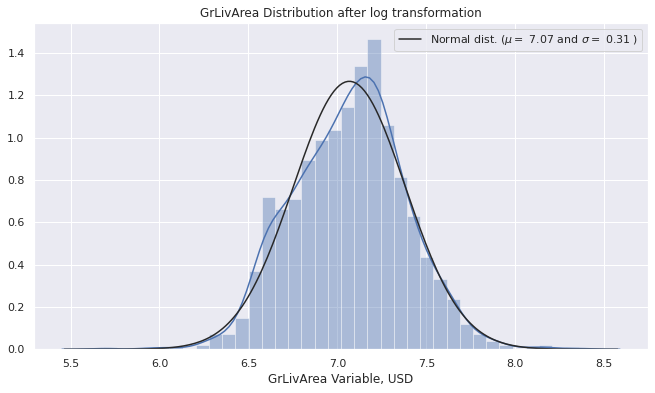


Mu: 7.067159506190003 Sigma: 0.3149417330351907


In [131]:
sns.set_style('darkgrid')
plt.subplots(figsize=(11, 6))
sns.distplot(train['GrLivArea'], color="b", fit=norm)
(Mu, Sigma) = norm.fit(train["GrLivArea"])
plt.title("GrLivArea Distribution after log transformation")
plt.xlabel("GrLivArea Variable, USD")
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(Mu, Sigma)],
            loc='best')
plt.show()

print('\nMu:', Mu, 'Sigma:', Sigma)

In [0]:
# Log transformation
train['GrLivArea'] = np.log1p(train['GrLivArea'])

In [0]:
sns.set_style('darkgrid')
plt.subplots(figsize=(11, 6))
sns.distplot(train['GrLivArea'], color="b", fit=norm)
(Mu, Sigma) = norm.fit(train["GrLivArea"])
plt.title("GrLivArea Distribution after log transformation")
plt.xlabel("GrLivArea Variable, USD")
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(Mu, Sigma)],
            loc='best')
plt.show()

print('\nMu:', Mu, 'Sigma:', Sigma)

In [0]:
sns.set_style('darkgrid')
plt.subplots(figsize=(11, 6))
sns.distplot(train['TotalBsmtSF'], color="b", fit=norm)
(Mu, Sigma) = norm.fit(train["TotalBsmtSF"])
plt.title("TotalBsmtSF Distribution after log transformation")
plt.xlabel("TotalBsmtSF Variable, USD")
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(Mu, Sigma)],
            loc='best')
plt.show()

print('\nMu:', Mu, 'Sigma:', Sigma)

<blockquote>
  <p>Aquí una transformación log(1+x) no es viable por las significativas observaciones con 0 (houses without basement).</p>
</blockquote>

In [0]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [0]:
#transform data
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

In [0]:
sns.set_style('darkgrid')
plt.subplots(figsize=(11, 6))
sns.distplot(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], color="b", fit=norm)
(Mu, Sigma) = norm.fit(train["TotalBsmtSF"])
plt.title("TotalBsmtSF Distribution after log transformation")
plt.xlabel("TotalBsmtSF Variable, USD")
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(Mu, Sigma)],
            loc='best')
plt.show()

print('\nMu:', Mu, 'Sigma:', Sigma)

### OHE